In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [45]:
# Load the data
data = pd.read_csv('formated_data.csv')

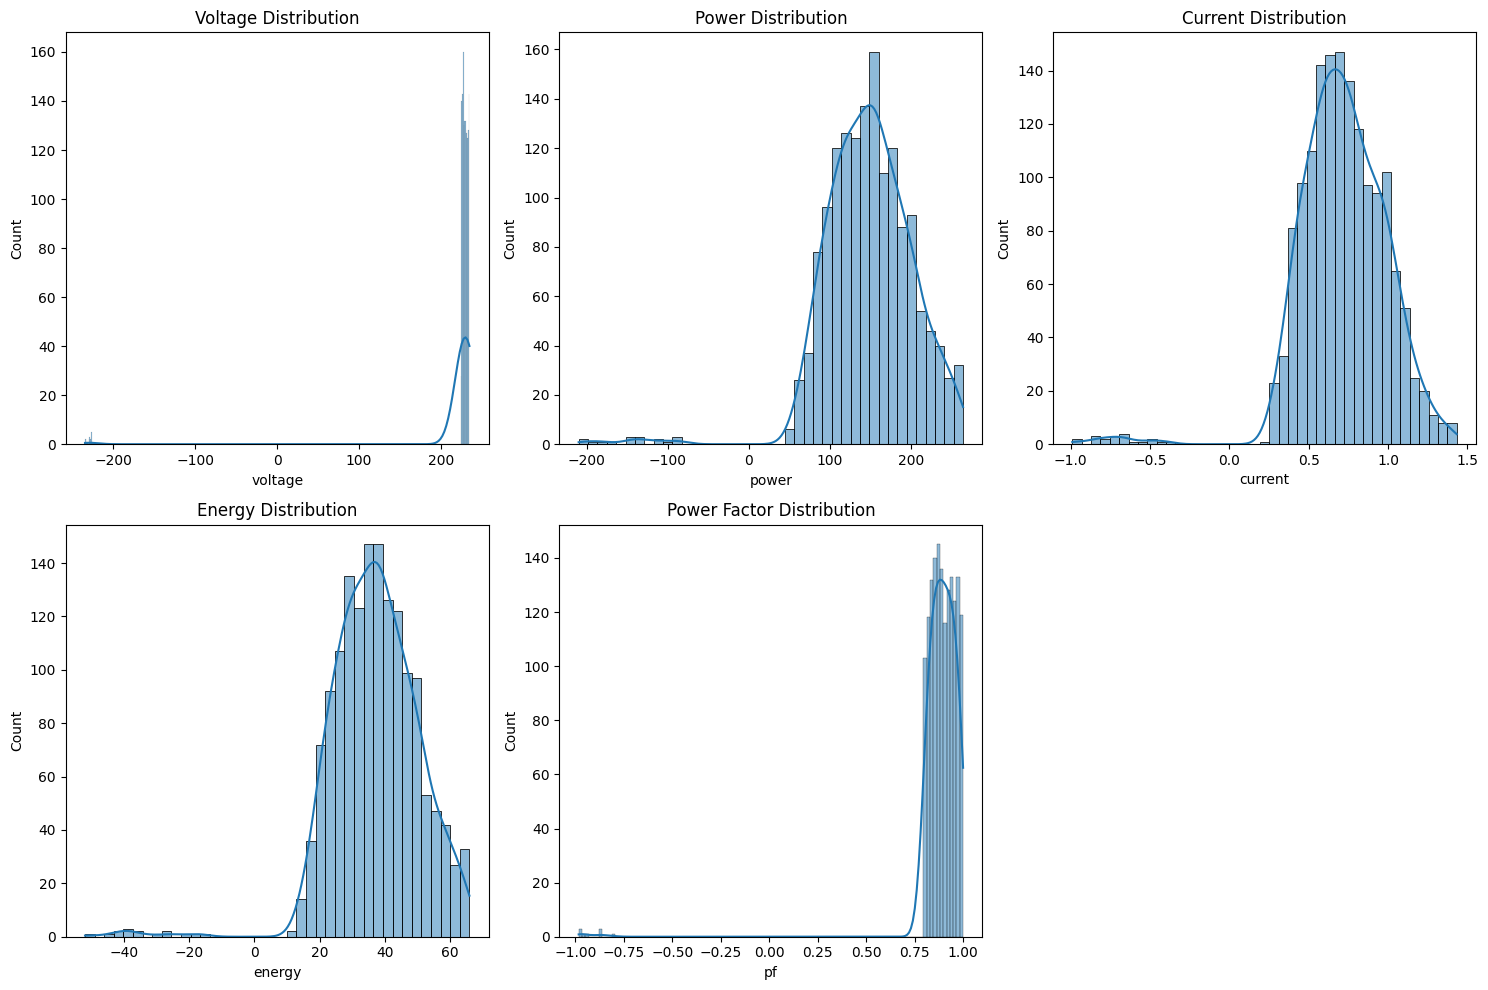

In [46]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Histograms
plt.subplot(2, 3, 1)
sns.histplot(data['voltage'], kde=True)
plt.title('Voltage Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['power'], kde=True)
plt.title('Power Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data['current'], kde=True)
plt.title('Current Distribution')

plt.subplot(2, 3, 4)
sns.histplot(data['energy'], kde=True)
plt.title('Energy Distribution')

plt.subplot(2, 3, 5)
sns.histplot(data['pf'], kde=True)
plt.title('Power Factor Distribution')

plt.tight_layout()
plt.show()

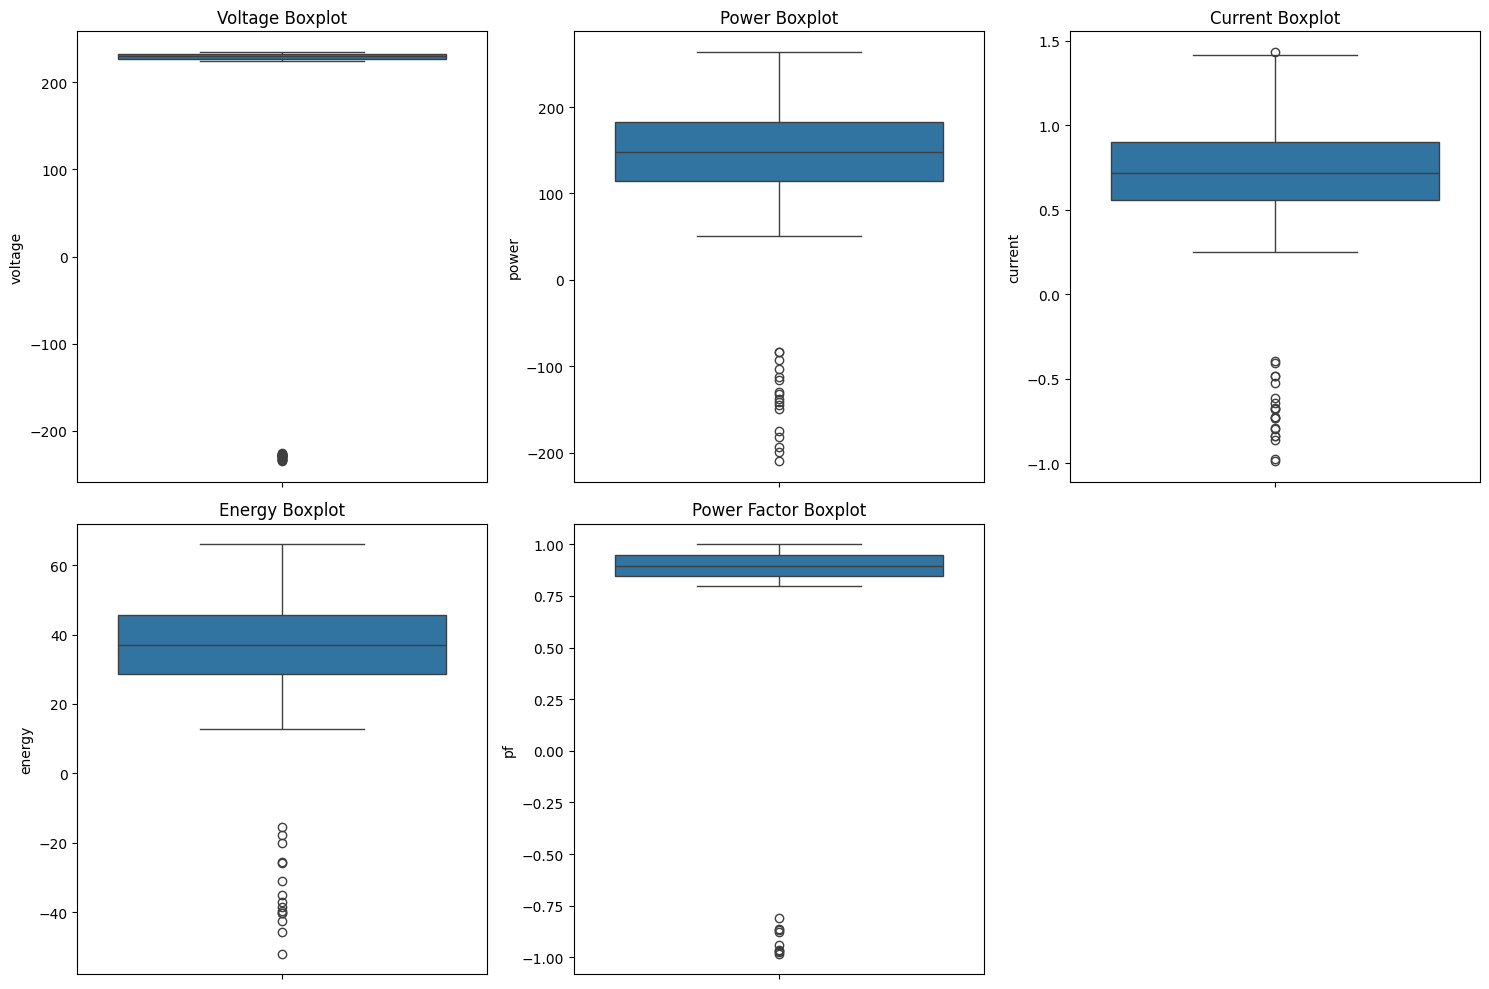

In [47]:
# Boxplots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=data['voltage'])
plt.title('Voltage Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=data['power'])
plt.title('Power Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['current'])
plt.title('Current Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=data['energy'])
plt.title('Energy Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=data['pf'])
plt.title('Power Factor Boxplot')

plt.tight_layout()
plt.show()

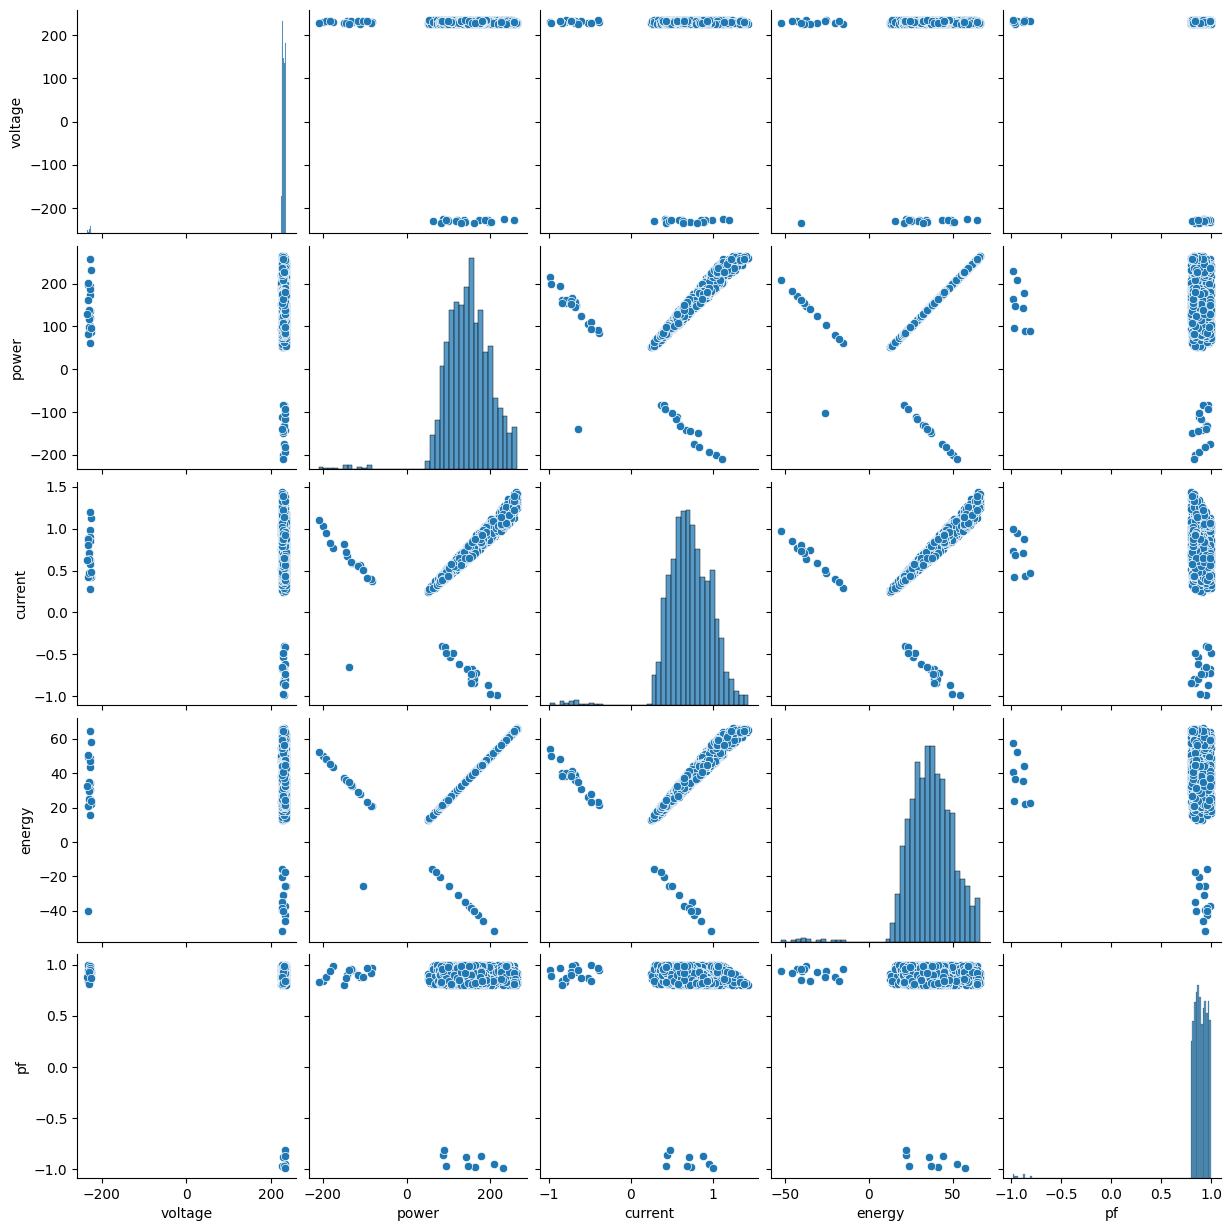

In [48]:
# Pairplot
sns.pairplot(data[['voltage', 'power', 'current', 'energy', 'pf']])
plt.show()

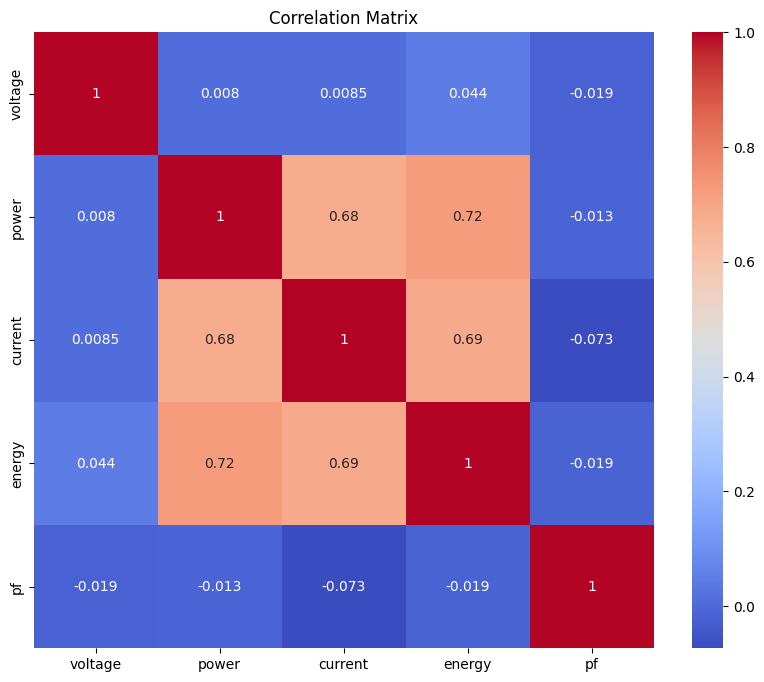

In [49]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[['voltage', 'power', 'current', 'energy', 'pf']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


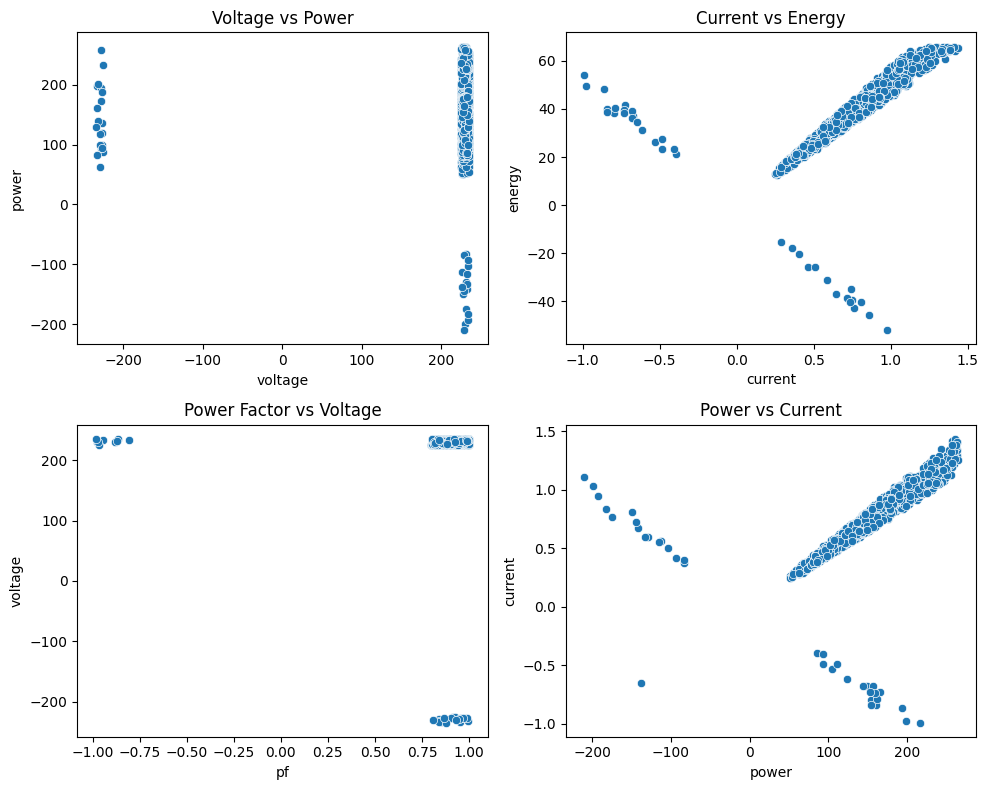

In [55]:
# Scatter plot for some pairs
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='voltage', y='power', data=data)
plt.title('Voltage vs Power')

plt.subplot(2, 2, 2)
sns.scatterplot(x='current', y='energy', data=data)
plt.title('Current vs Energy')

plt.subplot(2, 2, 3)
sns.scatterplot(x='pf', y='voltage', data=data)
plt.title('Power Factor vs Voltage')

plt.subplot(2, 2, 4)
sns.scatterplot(x='power', y='current', data=data)
plt.title('Power vs Current')

plt.tight_layout()
plt.show()

In [51]:
data.head()

,id,pf,voltage,power,current,energy,task,job_type,timestamp
0,0,0.907454,234.610302,234.046002,1.099334,58.511501,Inspection,robot,2024_07_19_20:00
1,1,0.850641,226.717015,214.814209,1.113865,53.703552,Inspection,robot,2024_07_19_20:15
2,2,0.984855,228.623872,226.119463,1.004256,56.529866,Inspection,robot,2024_07_19_20:30
3,3,0.865841,234.261008,228.060387,1.124376,57.015097,Inspection,robot,2024_07_19_20:45
4,4,0.860810,225.178685,234.805600,1.211361,58.701400,Inspection,robot,2024_07_19_21:00


In [52]:
# Prepare features and target
X = data[['pf', 'voltage', 'current', 'energy']]
y = data['power']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Create and train the model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train_scaled, y_train)

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
 

LinearRegression()

In [57]:
# Make predictions on validation set
y_val_pred = model.predict(X_test_scaled)
lr_y_val_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_y_val_pred)
lr_r2 = r2_score(y_test, lr_y_val_pred)



print(f"Validation MSE: {mse}")
print(f"Validation R2 Score: {r2}")
print()
print(f"Validation linear MSE: {lr_mse}")
print(f"Validation linear R2 Score: {lr_r2}")
 


Validation MSE: 425.4960112494579
Validation R2 Score: 0.8287733238796463

Validation linear MSE: 22987.809457897612
Validation linear R2 Score: -8.250677093788743


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
# Save the trained model as a pickle file
with open('randomforest_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'rendomforest_regression_model.pkl'")

Model saved as 'rendomforest_regression_model.pkl'
